In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:/Users/Sap0/Codeunnati_Schand/Dataset/mobile_data.csv")
df

,X,Y,Z
0,0.014579,-0.014945,1.007415
1,0.014091,0.001891,1.008879
2,0.014823,0.000183,1.011807
3,0.014091,0.001159,1.011807
4,0.014579,-0.012749,1.001071
...,...,...,...
95,0.015799,0.000183,1.010587
96,0.013847,0.000427,1.011319
97,0.016043,0.000427,1.012295
98,0.014823,-0.000793,1.010587


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
 2   Z       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [4]:
df.isnull().sum()

X    0
Y    0
Z    0
dtype: int64

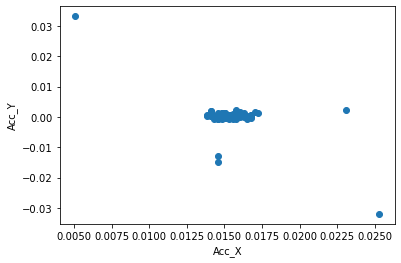

In [5]:
plt.scatter(df['X'],df['Y'])
plt.xlabel("Acc_X")
plt.ylabel("Acc_Y")
plt.show()

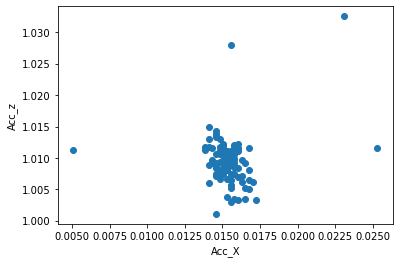

In [6]:
plt.scatter(df['X'],df['Z'])
plt.xlabel("Acc_X")
plt.ylabel("Acc_z")
plt.show()

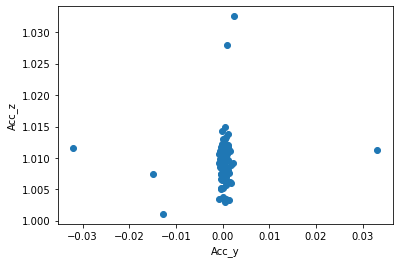

In [7]:
plt.scatter(df['Y'],df['Z'])
plt.xlabel("Acc_y")
plt.ylabel("Acc_z")
plt.show()

In [8]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(1, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
    return clusters_centers, k_values


In [9]:
clusters_centers,k_values=find_best_clusters(df,11)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
def elbow_plot(clusters_centers,k_values):
    plt.plot(k_values,clusters_centers,marker='o')
    plt.xlabel("no. of cluster")
    plt.ylabel('Cluster Inertia')

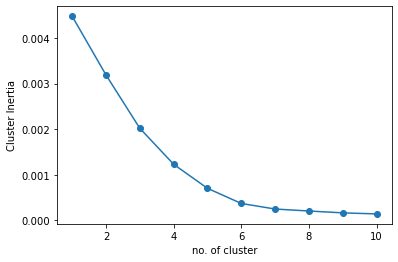

In [11]:
elbow_plot(clusters_centers,k_values)

In [12]:
K_model = KMeans(n_clusters=5)
K_model.fit(df)
df["cluster"] = K_model.labels_
df

,X,Y,Z,cluster
0,0.014579,-0.014945,1.007415,1
1,0.014091,0.001891,1.008879,0
2,0.014823,0.000183,1.011807,0
3,0.014091,0.001159,1.011807,0
4,0.014579,-0.012749,1.001071,1
...,...,...,...,...
95,0.015799,0.000183,1.010587,0
96,0.013847,0.000427,1.011319,0
97,0.016043,0.000427,1.012295,0
98,0.014823,-0.000793,1.010587,0


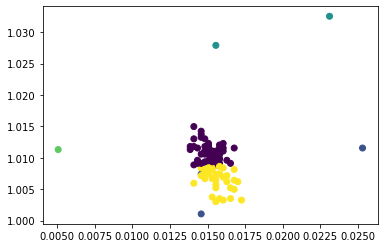

In [13]:
plt.scatter(df["X"],df["Z"],c=df["cluster"])